## Model Selection and Results
The objective of this analysis is to build a predictive model that determines whether a customer will submit a claim during their policy period. This binary classification task utilizes automobile insurance data to identify key factors influencing claim submission.

### 1. Training and evaluation

In [1]:
from claim_prediction import claim_prediction

input_path = "data/claims_dummy_data.csv"
save_dir = "output"


def run_claim_prediction(balance_strategy=None, outlier_strategy=None):
    outlier_boundary_method = "IQR" if outlier_strategy is not None else None
    return_pfi = (outlier_strategy is None)
    print(f"\n---> Running claim prediction with balance_strategy={balance_strategy}, outlier_strategy={outlier_strategy}, outlier_boundary_method={outlier_boundary_method}")
    _, results_df = claim_prediction(input_path, 
                                     balance_strategy=balance_strategy, 
                                     outlier_strategy=outlier_strategy,
                                     outlier_boundary_method=outlier_boundary_method,
                                     return_pfi=return_pfi,
                                     save_dir=save_dir)
    results_df['balance_strategy'] = balance_strategy
    results_df['outlier_strategy'] = outlier_strategy
    
    results_df['model'] = results_df['model'].map({
        'logistic_regression': 'Logistic Regression',
        'linear_svc': 'Linear SVC',
        'svc': 'SVC',
        'mlp': 'MLP',
        'random_forest': 'Random Forest',
        'xgboost': 'XGBoost', 
        'stacking': 'Stacking Ensemble',
    })
    results_df['balance_strategy'] = results_df['balance_strategy'].map({
        None: 'None',
        'class_weight': 'Class Weight',
        'SMOTE': 'SMOTE',
        'ADASYN': 'ADASYN',
    })
    results_df['outlier_strategy'] = results_df['outlier_strategy'].map({
        None: 'None',
        'cap': 'Cap',
        'remove': 'Remove',
    })
    
    return results_df
    

results_df = run_claim_prediction()
results_df.to_csv(f"{save_dir}/default_results.csv", index=False)
results_df

2024-10-30 11:43:44 - INFO - Encoding categorical variables: Gender, Vehicle_Age, and Previous_Vehicle_Damage



---> Running claim prediction with balance_strategy=None, outlier_strategy=None, outlier_boundary_method=None


2024-10-30 11:43:44 - INFO - Initial data: X: (382154, 9), y: (382154,)
2024-10-30 11:43:44 - INFO - Splitting the data into train, validation, and test sets (test_size=0.1, validation_size=0.1)
2024-10-30 11:43:44 - INFO - Scaling numerical variables: 'Age' and 'Annual_Premium'
2024-10-30 11:43:44 - INFO - Final data: Train: (305724, 9), (305724,) | Validation: (38215, 9), (38215,) | Test: (38215, 9), (38215,)
2024-10-30 11:43:44 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/logistic_regression_model.pkl
2024-10-30 11:43:44 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/logistic_regression_results.json
2024-10-30 11:43:44 - INFO - Loading linear_svc model from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/linear_svc_model.pkl
2024-10-30 11:43:44 - INFO - Loading linear_svc model results from cac

,model,best_params,ranked_features,best_threshold,best_score,training_time,precision,recall,f1,roc_auc,inference_time,ranked_pfi,results_save_path,model_save_path,balance_strategy,outlier_strategy
0,Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}","{'Previously_Insured': -4.230383575368234, 'Pr...",0.286421,0.562796,47.39,42.86,81.44,56.16,86.55,0.00,{'Previous_Vehicle_Damage': 0.1636372369488136...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
1,Linear SVC,{'C': 1},"{'Previously_Insured': -0.658258567092265, 'Pr...",0.257312,0.563073,0.52,43.01,80.50,56.06,86.52,0.00,{'Previous_Vehicle_Damage': 0.1510814033087821...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
2,MLP,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",None,0.325816,0.592098,77.03,47.21,79.50,59.24,88.87,0.09,{'Previous_Vehicle_Damage': 0.1792705184906827...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
3,Random Forest,"{'bootstrap': True, 'criterion': 'gini', 'max_...",{'Previous_Vehicle_Damage': 0.5807205777258714...,0.308156,0.606910,24.26,48.42,80.91,60.59,89.28,0.12,{'Previous_Vehicle_Damage': 0.1810386827770406...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
4,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",{'Previous_Vehicle_Damage': 0.5667713284492493...,0.329345,0.611125,5.79,49.40,79.92,61.06,89.57,0.09,{'Previous_Vehicle_Damage': 0.1854805659049987...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
5,Stacking Ensemble,None,None,0.231573,0.609613,0.30,49.02,80.16,60.84,89.53,0.23,{'Previous_Vehicle_Damage': 0.1847153169742551...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None


#### 1.1. Plot Model Performance (ROC AUC and F1 Score)

/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_28529/47515043.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)


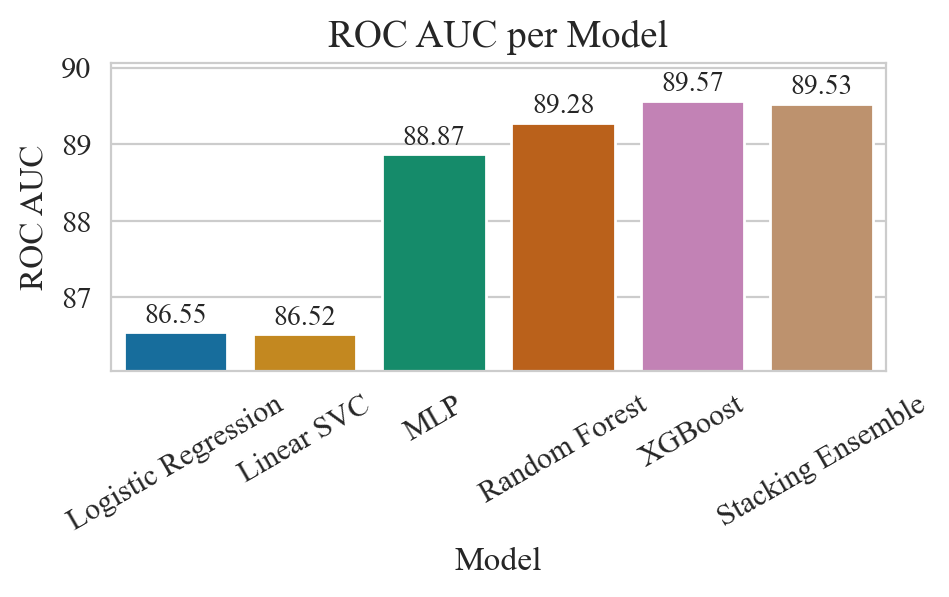

/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_28529/47515043.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)


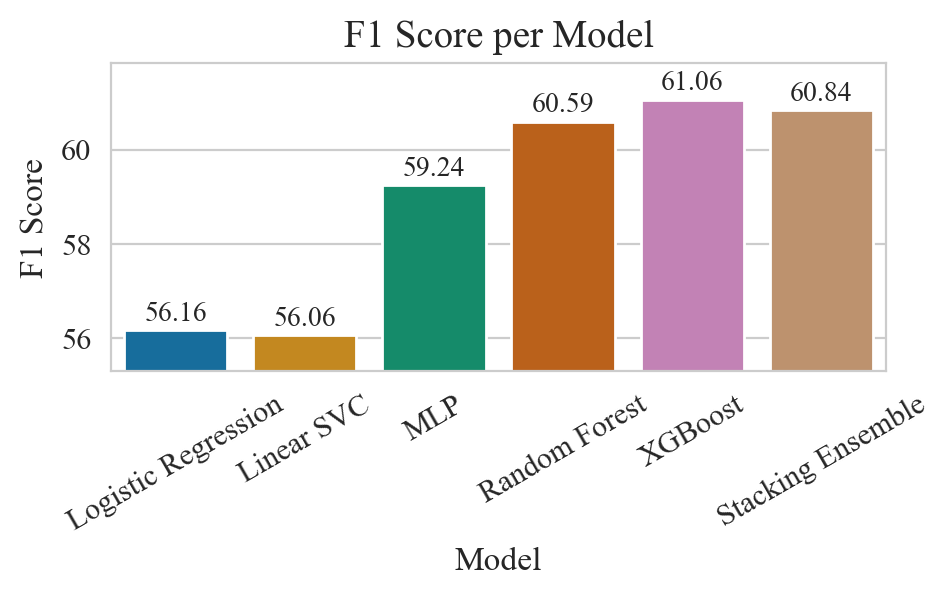

In [2]:
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
import seaborn as sns


sns.set_style("whitegrid")

plt.rcParams.update({
    'font.family': 'Times New Roman',  #'Arial',  # or 'Helvetica', 'Times New Roman'
    'font.size': 12,  # General font size
    'axes.titlesize': 14,  # Font size for titles
    'axes.labelsize': 12,  # Font size for axis labels
    'xtick.labelsize': 11,  # Font size for x-tick labels
    'ytick.labelsize': 11,   # Font size for y-tick labels
    'legend.fontsize': 11,   # Font size for legend
    'legend.title_fontsize': 11   # Font size for legend title
})


def barplot_results(results_df, y='roc_auc', hue=None):
    y_label = {
        'roc_auc': 'ROC AUC', 'f1': 'F1 Score', 'precision': 'Precision', 'recall': 'Recall', 'accuracy': 'Accuracy', 
        'training_time': 'Training Time', 'inference_time': 'Inference Time'
    }[y]
    
    if hue is not None:
        hue_label = {'balance_strategy': 'Balance Strategy', 'outlier_strategy': 'Outlier Strategy'}[hue]
        palette = sns.color_palette("colorblind", len(results_df[hue].unique()))  # Use a different color per hue category
        figsize = (8, 2.5)
        annotate_fontsize = 8
        
        # Print average performance of models per hue category
        _better_models = ['MLP', 'Random Forest', 'XGBoost']
        avg_performance_per_hue = results_df[results_df['model'].isin(_better_models)].groupby([hue]).agg({y: 'mean'}).reset_index().sort_values(by=y, ascending=False)
        print(f"Average {y_label} per {hue_label} over {_better_models}:\n{avg_performance_per_hue.to_string(index=False)}")
    else:
        hue_label = None
        palette = sns.color_palette("colorblind", len(results_df['model'].unique()))  # Use a different color per model
        figsize = (5, 2)
        annotate_fontsize = 10
        
    # Create the plot
    plt.figure(figsize=figsize, dpi=200)
    barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)
    
    if hue is not None:
        plt.legend(title=hue_label)
    plt.title(f"{y_label} per Model")
    plt.xticks(rotation=30)
    plt.xlabel("Model")
    plt.ylabel(y_label)

    # Adjust the y-axis to make performance differences more visible
    y_margin = results_df[y].std() / 3
    y_min = results_df[y].min() - y_margin
    y_max = results_df[y].max() + y_margin
    plt.ylim(y_min, y_max)

    # Annotate each bar with the corresponding value
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'),  # Format the value with 4 decimal places
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text at the center of each bar
                        ha = 'center', va = 'center',  # Center alignment
                        xytext = (0, 6),  # Distance from the bar
                        textcoords = 'offset points', fontsize=annotate_fontsize)  # Set text size

    # Show the plot
    plt.show()
    
    
barplot_results(results_df, y='roc_auc')
barplot_results(results_df, y='f1')

Insights:
- Linear models fall short compared to others, showing the task being non-linearly separable.
- XGBoost stands on top as the best performing model in terms of both ROC AUC and F1, followed by Random Forest and MLP.

#### 1.2. Runtime Comparison

/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_28529/47515043.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)


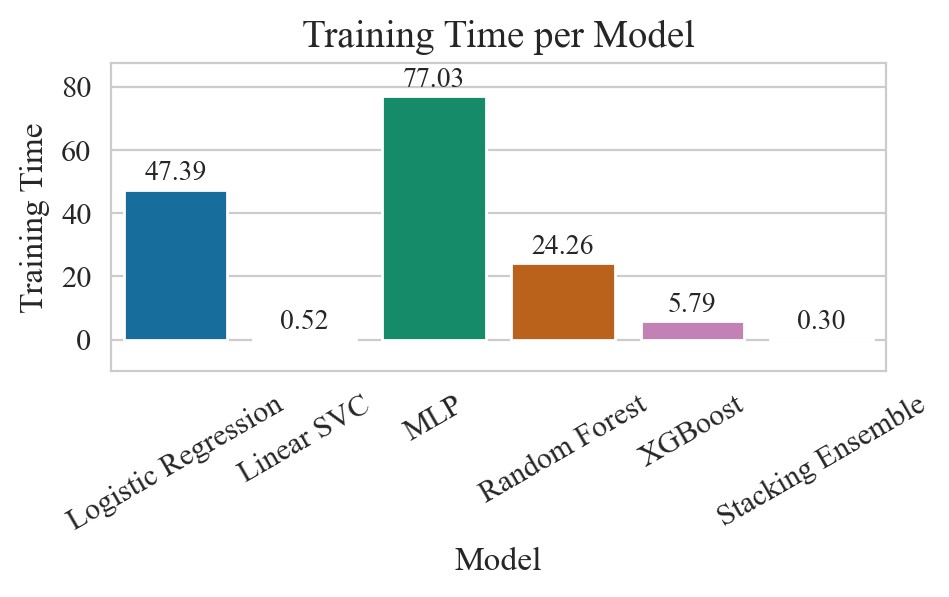

/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_28529/47515043.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='model', y=y, hue=hue, data=results_df, palette=palette)


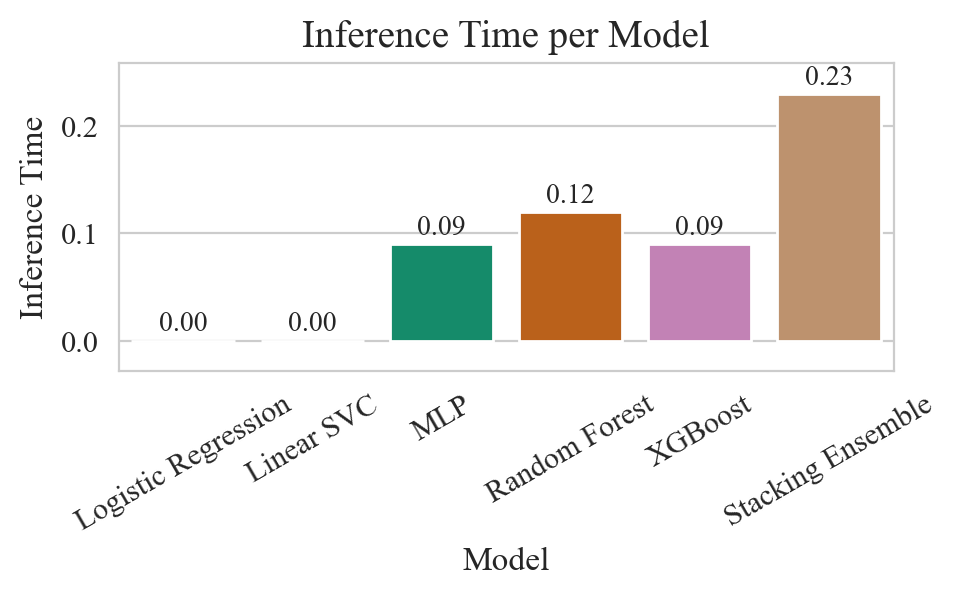

In [3]:
barplot_results(results_df, y='training_time')
barplot_results(results_df, y='inference_time')

Insights: 
- XGBoost is the the most efficient non-linear model in terms of training runtime beating Random Forest and MLP (by far).
- It also achieves the best inference runtime (together with MLP) across non-linear models.
- It is worth mentioning that linear are very efficient in inference but not very accurate in this case.

### 2. Compare Outlier Strategies

In [4]:
import pandas as pd

os_results = []
for outlier_strategy in [None, 'cap', 'remove']:
    rdf = run_claim_prediction(outlier_strategy=outlier_strategy)
    os_results.append(rdf) 
                      
os_df = pd.concat(os_results)
os_df.to_csv(f"{save_dir}/outlier_strategies_results.csv", index=False)
os_df

2024-10-30 11:43:45 - INFO - Encoding categorical variables: Gender, Vehicle_Age, and Previous_Vehicle_Damage



---> Running claim prediction with balance_strategy=None, outlier_strategy=None, outlier_boundary_method=None


2024-10-30 11:43:45 - INFO - Initial data: X: (382154, 9), y: (382154,)
2024-10-30 11:43:45 - INFO - Splitting the data into train, validation, and test sets (test_size=0.1, validation_size=0.1)
2024-10-30 11:43:46 - INFO - Scaling numerical variables: 'Age' and 'Annual_Premium'
2024-10-30 11:43:46 - INFO - Final data: Train: (305724, 9), (305724,) | Validation: (38215, 9), (38215,) | Test: (38215, 9), (38215,)
2024-10-30 11:43:46 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/logistic_regression_model.pkl
2024-10-30 11:43:46 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/logistic_regression_results.json
2024-10-30 11:43:46 - INFO - Loading linear_svc model from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/linear_svc_model.pkl
2024-10-30 11:43:46 - INFO - Loading linear_svc model results from cac


---> Running claim prediction with balance_strategy=None, outlier_strategy=cap, outlier_boundary_method=IQR


2024-10-30 11:43:46 - INFO - Initial data: X: (382154, 9), y: (382154,)
2024-10-30 11:43:46 - INFO - Splitting the data into train, validation, and test sets (test_size=0.1, validation_size=0.1)
2024-10-30 11:43:46 - INFO - Handling outliers using 'cap' strategy and 'IQR' boundary method
2024-10-30 11:43:46 - INFO - Scaling numerical variables: 'Age' and 'Annual_Premium'
2024-10-30 11:43:46 - INFO - Final data: Train: (305724, 9), (305724,) | Validation: (38215, 9), (38215,) | Test: (38215, 9), (38215,)
2024-10-30 11:43:46 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-None_outliers-cap-IQR_seed-42/logistic_regression_model.pkl
2024-10-30 11:43:46 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-None_outliers-cap-IQR_seed-42/logistic_regression_results.json
2024-10-30 11:43:46 - INFO - Loading linear_svc model from cache: output/claims_dummy_data-0.1_balance-None_outliers-cap-IQR_seed-42/lin


---> Running claim prediction with balance_strategy=None, outlier_strategy=remove, outlier_boundary_method=IQR


2024-10-30 11:43:47 - INFO - Handling outliers using 'remove' strategy and 'IQR' boundary method
2024-10-30 11:43:47 - INFO - Scaling numerical variables: 'Age' and 'Annual_Premium'
2024-10-30 11:43:47 - INFO - Final data: Train: (297367, 9), (297367,) | Validation: (38215, 9), (38215,) | Test: (38215, 9), (38215,)
2024-10-30 11:43:47 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-None_outliers-remove-IQR_seed-42/logistic_regression_model.pkl
2024-10-30 11:43:47 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-None_outliers-remove-IQR_seed-42/logistic_regression_results.json
2024-10-30 11:43:47 - INFO - Loading linear_svc model from cache: output/claims_dummy_data-0.1_balance-None_outliers-remove-IQR_seed-42/linear_svc_model.pkl
2024-10-30 11:43:47 - INFO - Loading linear_svc model results from cache: output/claims_dummy_data-0.1_balance-None_outliers-remove-IQR_seed-42/linear_svc_results.js

,model,best_params,ranked_features,best_threshold,best_score,training_time,precision,recall,f1,roc_auc,inference_time,ranked_pfi,results_save_path,model_save_path,balance_strategy,outlier_strategy
0,Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}","{'Previously_Insured': -4.230383575368234, 'Pr...",0.286421,0.562796,47.39,42.86,81.44,56.16,86.55,0.00,{'Previous_Vehicle_Damage': 0.1636372369488136...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
1,Linear SVC,{'C': 1},"{'Previously_Insured': -0.658258567092265, 'Pr...",0.257312,0.563073,0.52,43.01,80.50,56.06,86.52,0.00,{'Previous_Vehicle_Damage': 0.1510814033087821...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
2,MLP,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",None,0.325816,0.592098,77.03,47.21,79.50,59.24,88.87,0.09,{'Previous_Vehicle_Damage': 0.1792705184906827...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
3,Random Forest,"{'bootstrap': True, 'criterion': 'gini', 'max_...",{'Previous_Vehicle_Damage': 0.5807205777258714...,0.308156,0.606910,24.26,48.42,80.91,60.59,89.28,0.12,{'Previous_Vehicle_Damage': 0.1810386827770406...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
4,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",{'Previous_Vehicle_Damage': 0.5667713284492493...,0.329345,0.611125,5.79,49.40,79.92,61.06,89.57,0.09,{'Previous_Vehicle_Damage': 0.1854805659049987...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
5,Stacking Ensemble,None,None,0.231573,0.609613,0.30,49.02,80.16,60.84,89.53,0.23,{'Previous_Vehicle_Damage': 0.1847153169742551...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
0,Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}","{'Previously_Insured': -4.197792023488362, 'Pr...",0.286257,0.563040,6.37,42.87,81.47,56.18,86.56,0.00,None,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,Cap
1,Linear SVC,{'C': 10},"{'Previously_Insured': -0.6865908181856013, 'P...",0.256394,0.563467,0.58,42.88,80.65,55.99,86.54,0.00,None,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,Cap
2,MLP,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",None,0.263800,0.591567,47.68,45.56,83.02,58.84,88.79,0.07,None,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,Cap
3,Random Forest,"{'bootstrap': True, 'criterion': 'gini', 'max_...","{'Previous_Vehicle_Damage': 0.580394376055312,...",0.312660,0.606935,24.67,48.52,80.59,60.58,89.28,0.12,None,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,Cap


#### 2.1. Plot Model Performance (ROC AUC and F1 Score)

Average ROC AUC per Outlier Strategy over ['MLP', 'Random Forest', 'XGBoost']:
outlier_strategy   roc_auc
            None 89.240000
             Cap 89.220000
          Remove 89.176667


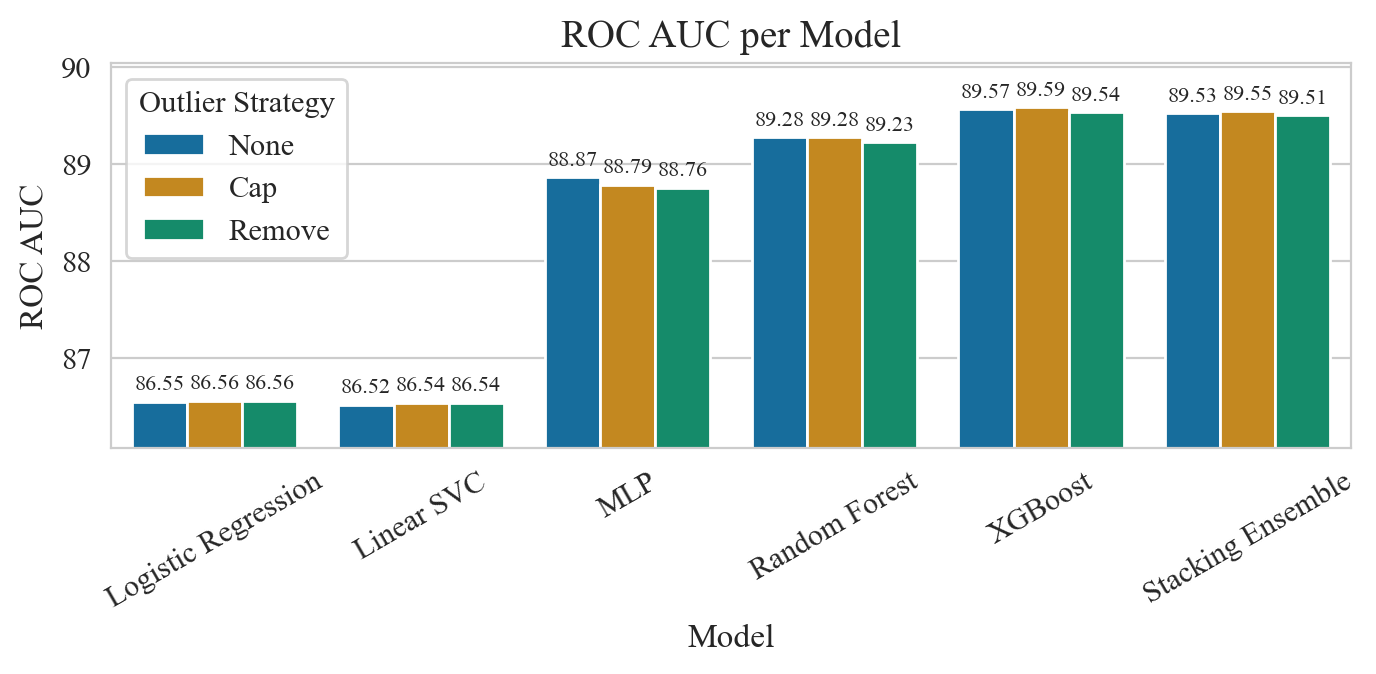

Average F1 Score per Outlier Strategy over ['MLP', 'Random Forest', 'XGBoost']:
outlier_strategy        f1
            None 60.296667
             Cap 60.130000
          Remove 60.073333


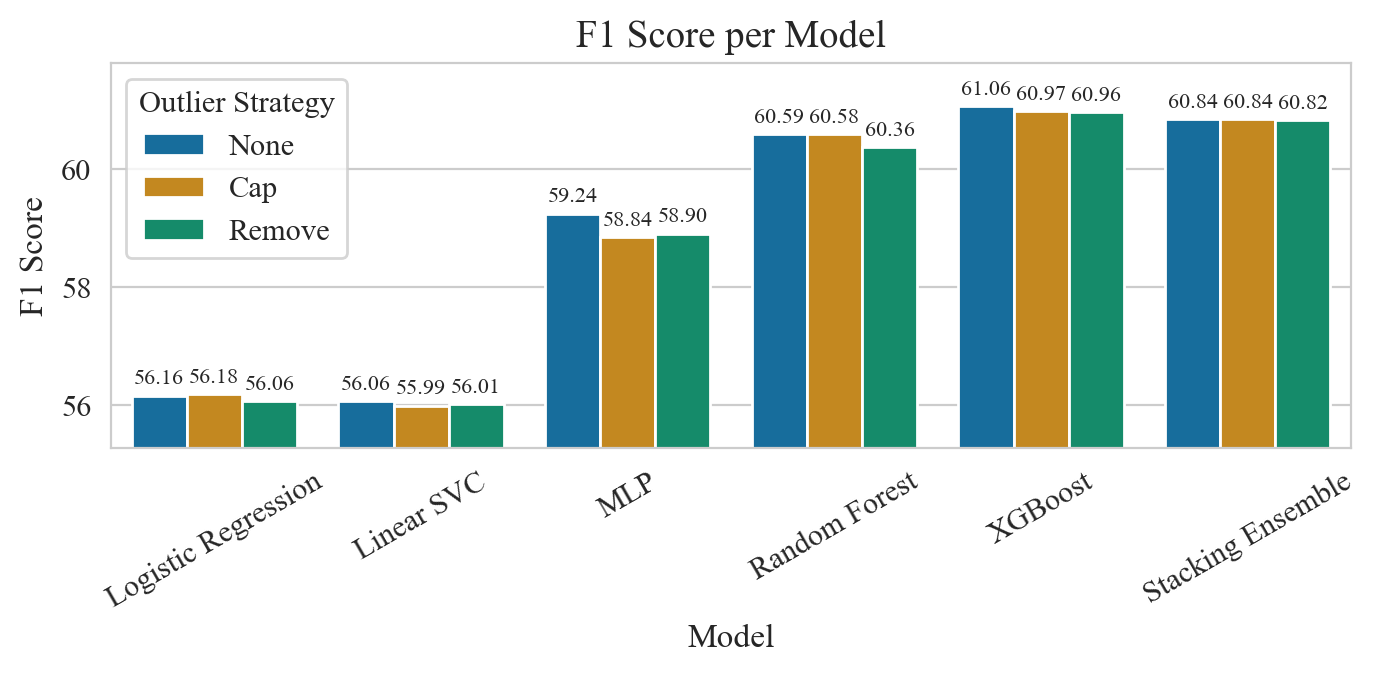

In [5]:
barplot_results(os_df, y='roc_auc', hue='outlier_strategy')
barplot_results(os_df, y='f1', hue='outlier_strategy')

#### Insights:
- As expected, removing outliers (from the training set) consistently underperforms and is not recommended.
- Outlier capping generally had a small impact across models.
- Linear models performed slightly better in ROC AUC with outlier capping.
- MLP performed considerably worse with outlier capping.
- Tree-based models, Logistic Regression and XGBoost, showed minimal sensitivity to the outlier strategy.
- This suggests that the models, particularly ensemble ones like Random Forest and XGBoost, may already be robust to outliers or that the data’s outliers were not significantly impactful on performance.
- The feature `Annual_Premium` with right-skewed distribution which was capped for outliers has a very low correlation (0.03) with the target variable. This weak correlation justifies the limited impact of outlier capping on model performance, as the feature does not hold significant predictive power.

### 3. Compare Balance Strategies

In [6]:
import pandas as pd

bs_results = []
for balance_strategy in [None, 'class_weight', 'SMOTE']:
    rdf = run_claim_prediction(balance_strategy=balance_strategy)  #, outlier_strategy='cap')
    bs_results.append(rdf) 
                      
bs_df = pd.concat(bs_results)
bs_df.to_csv(f"{save_dir}/balance_strategies_results.csv", index=False)
bs_df


---> Running claim prediction with balance_strategy=None, outlier_strategy=None, outlier_boundary_method=None


2024-10-30 11:43:47 - INFO - Encoding categorical variables: Gender, Vehicle_Age, and Previous_Vehicle_Damage
2024-10-30 11:43:47 - INFO - Initial data: X: (382154, 9), y: (382154,)
2024-10-30 11:43:47 - INFO - Splitting the data into train, validation, and test sets (test_size=0.1, validation_size=0.1)
2024-10-30 11:43:47 - INFO - Scaling numerical variables: 'Age' and 'Annual_Premium'
2024-10-30 11:43:47 - INFO - Final data: Train: (305724, 9), (305724,) | Validation: (38215, 9), (38215,) | Test: (38215, 9), (38215,)
2024-10-30 11:43:47 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/logistic_regression_model.pkl
2024-10-30 11:43:47 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-None_outliers-None-None_seed-42/logistic_regression_results.json
2024-10-30 11:43:47 - INFO - Loading linear_svc model from cache: output/claims_dummy_data-0.1_balance-None_outliers


---> Running claim prediction with balance_strategy=class_weight, outlier_strategy=None, outlier_boundary_method=None


2024-10-30 11:43:48 - INFO - Scaling numerical variables: 'Age' and 'Annual_Premium'
2024-10-30 11:43:48 - INFO - Final data: Train: (305724, 9), (305724,) | Validation: (38215, 9), (38215,) | Test: (38215, 9), (38215,)
2024-10-30 11:43:48 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-class_weight_outliers-None-None_seed-42/logistic_regression_model.pkl
2024-10-30 11:43:48 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-class_weight_outliers-None-None_seed-42/logistic_regression_results.json
2024-10-30 11:43:48 - INFO - Loading linear_svc model from cache: output/claims_dummy_data-0.1_balance-class_weight_outliers-None-None_seed-42/linear_svc_model.pkl
2024-10-30 11:43:48 - INFO - Loading linear_svc model results from cache: output/claims_dummy_data-0.1_balance-class_weight_outliers-None-None_seed-42/linear_svc_results.json
2024-10-30 11:43:48 - WARNING - Class weights are not supported fo


---> Running claim prediction with balance_strategy=SMOTE, outlier_strategy=None, outlier_boundary_method=None


2024-10-30 11:43:48 - INFO - Scaling numerical variables: 'Age' and 'Annual_Premium'
2024-10-30 11:43:48 - INFO - Handling class imbalance using 'SMOTE' strategy
/Users/saeed/projects/claim_prediction/.venv/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
2024-10-30 11:43:49 - INFO - Final data: Train: (511286, 9), (511286,) | Validation: (38215, 9), (38215,) | Test: (38215, 9), (38215,)
2024-10-30 11:43:49 - INFO - Loading logistic_regression model from cache: output/claims_dummy_data-0.1_balance-SMOTE_outliers-None-None_seed-42/logistic_regression_model.pkl
2024-10-30 11:43:49 - INFO - Loading logistic_regression model results from cache: output/claims_dummy_data-0.1_balance-SMOTE_outliers-None-None_seed-42/logistic_regression_results.json
2024-10-30 11:43:49 - INFO - L

,model,best_params,ranked_features,best_threshold,best_score,training_time,precision,recall,f1,roc_auc,inference_time,ranked_pfi,results_save_path,model_save_path,balance_strategy,outlier_strategy
0,Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}","{'Previously_Insured': -4.230383575368234, 'Pr...",0.286421,0.562796,47.39,42.86,81.44,56.16,86.55,0.00,{'Previous_Vehicle_Damage': 0.1636372369488136...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
1,Linear SVC,{'C': 1},"{'Previously_Insured': -0.658258567092265, 'Pr...",0.257312,0.563073,0.52,43.01,80.50,56.06,86.52,0.00,{'Previous_Vehicle_Damage': 0.1510814033087821...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
2,MLP,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",None,0.325816,0.592098,77.03,47.21,79.50,59.24,88.87,0.09,{'Previous_Vehicle_Damage': 0.1792705184906827...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
3,Random Forest,"{'bootstrap': True, 'criterion': 'gini', 'max_...",{'Previous_Vehicle_Damage': 0.5807205777258714...,0.308156,0.606910,24.26,48.42,80.91,60.59,89.28,0.12,{'Previous_Vehicle_Damage': 0.1810386827770406...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
4,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",{'Previous_Vehicle_Damage': 0.5667713284492493...,0.329345,0.611125,5.79,49.40,79.92,61.06,89.57,0.09,{'Previous_Vehicle_Damage': 0.1854805659049987...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
5,Stacking Ensemble,None,None,0.231573,0.609613,0.30,49.02,80.16,60.84,89.53,0.23,{'Previous_Vehicle_Damage': 0.1847153169742551...,output/claims_dummy_data-0.1_balance-None_outl...,output/claims_dummy_data-0.1_balance-None_outl...,None,None
0,Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}","{'Previously_Insured': -4.204597031921672, 'Pr...",0.663338,0.562805,6.55,42.69,82.06,56.16,86.54,0.00,{'Previous_Vehicle_Damage': 0.1628382135340756...,output/claims_dummy_data-0.1_balance-class_wei...,output/claims_dummy_data-0.1_balance-class_wei...,Class Weight,None
1,Linear SVC,{'C': 1},"{'Previously_Insured': -1.1628368505599, 'Prev...",0.277076,0.562945,0.63,42.50,82.86,56.18,86.53,0.00,{'Previous_Vehicle_Damage': 0.1619559757613449...,output/claims_dummy_data-0.1_balance-class_wei...,output/claims_dummy_data-0.1_balance-class_wei...,Class Weight,None
2,Random Forest,"{'bootstrap': True, 'criterion': 'gini', 'max_...",{'Previous_Vehicle_Damage': 0.7595468904504727...,0.682065,0.604464,26.42,48.32,80.86,60.49,89.25,0.15,{'Previous_Vehicle_Damage': 0.1826402485179344...,output/claims_dummy_data-0.1_balance-class_wei...,output/claims_dummy_data-0.1_balance-class_wei...,Class Weight,None
3,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...","{'Previously_Insured': 0.6245288252830505, 'Pr...",0.657841,0.595560,10.42,48.33,74.89,58.75,88.80,0.29,{'Previous_Vehicle_Damage': 0.1788454033335278...,output/claims_dummy_data-0.1_balance-class_wei...,output/claims_dummy_data-0.1_balance-class_wei...,Class Weight,None


#### 3.1. Plot Model Performance (ROC AUC and F1 Score)

Average ROC AUC per Balance Strategy over ['MLP', 'Random Forest', 'XGBoost']:
balance_strategy   roc_auc
            None 89.240000
    Class Weight 89.025000
           SMOTE 88.833333


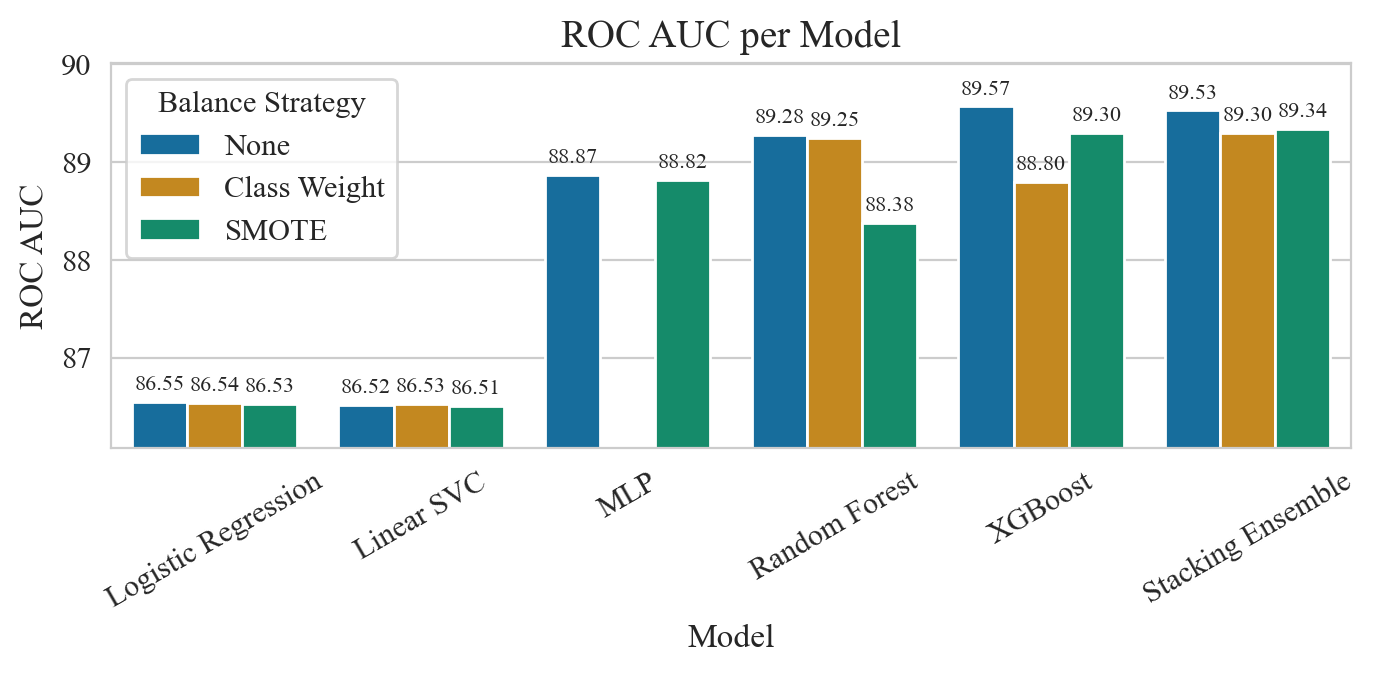

Average F1 Score per Balance Strategy over ['MLP', 'Random Forest', 'XGBoost']:
balance_strategy        f1
            None 60.296667
    Class Weight 59.620000
           SMOTE 59.400000


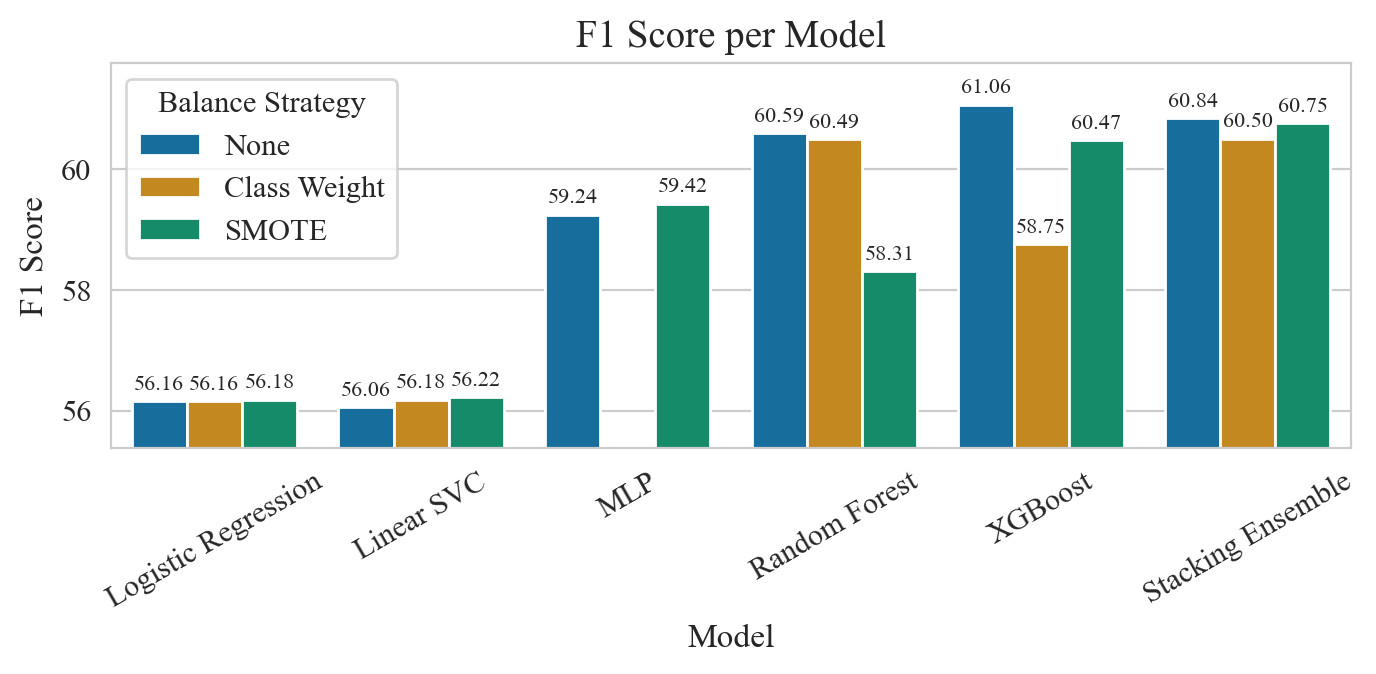

In [7]:
barplot_results(bs_df, y='roc_auc', hue='balance_strategy')
barplot_results(bs_df, y='f1', hue='balance_strategy')

Insights: 
- When handling class imbalance, Class Weight and SMOTE methods slightly improved linear models.
- In average, Class Weight performed slightly better than SMOTE across models.
- Interestingly, for Random Forest and XGBoost, any balancing strategy results in performance drop, showing the superiority of the default (None) strategy for such models.

### 4. Feature Importance

In [8]:
results_df = bs_df[(bs_df['balance_strategy'] == 'None') & (bs_df['outlier_strategy'] == 'None')]

#### 4.1. Model-specific Ranked Features

/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_28529/626827487.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_28529/626827487.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_28529/626827487.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/sl/9pbn4q1x4dbdd6n7khfkcg9c0000gn/T/ipykernel_28529/626827487.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

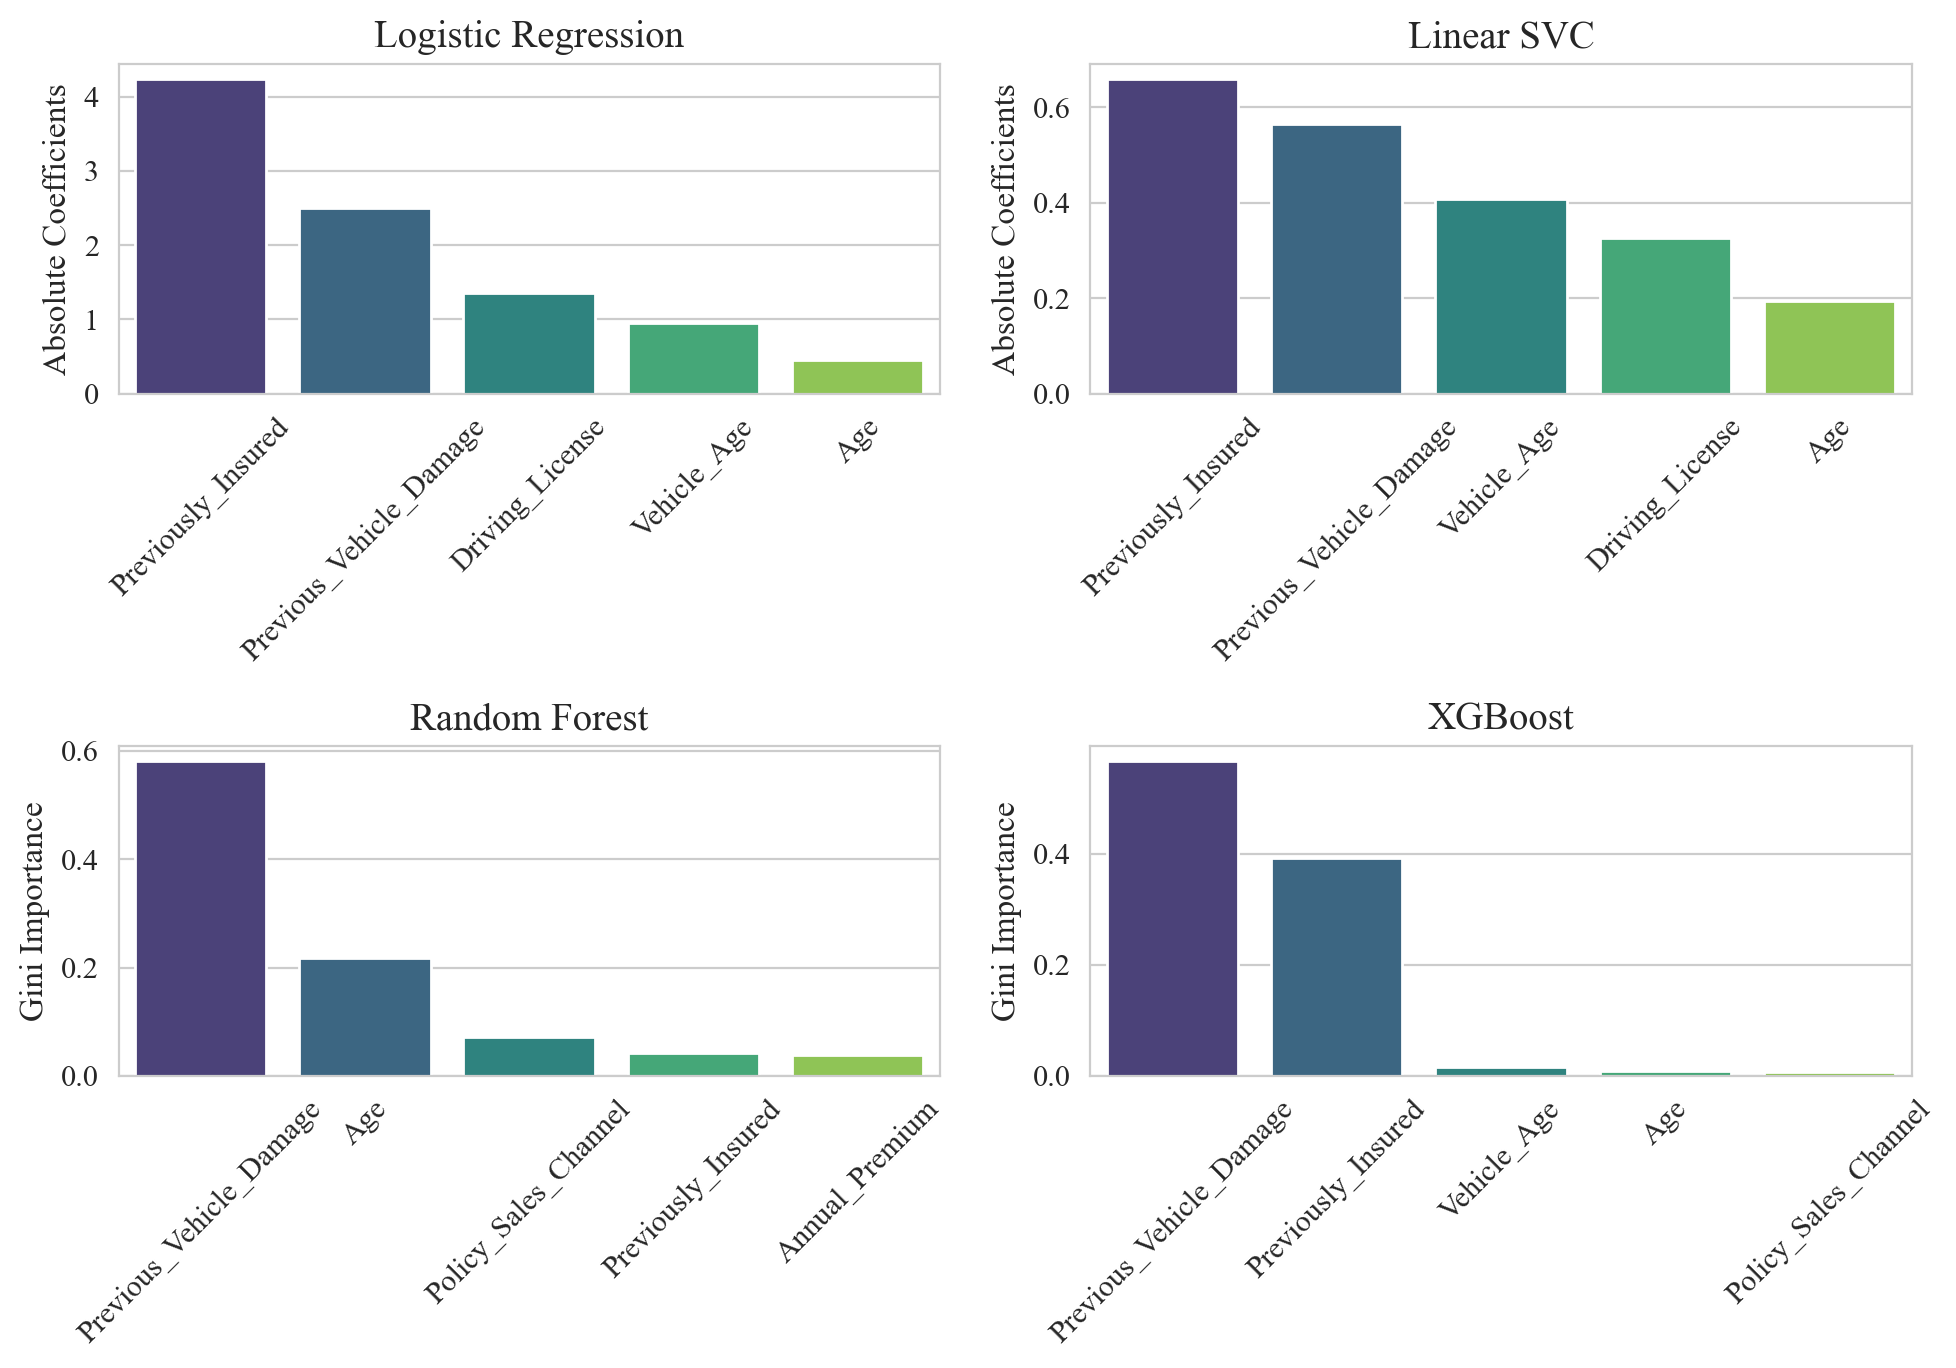

In [9]:
def barplot_feature_importance(results_df, features_col='ranked_features', top_n=5):
    # Filter out models with missing feature importance
    results_df = results_df[results_df[features_col].notnull()]
    feature_importances = pd.DataFrame(results_df[features_col].tolist(), index=results_df['model'])
    
    n_models = len(feature_importances)
    n_cols = 2
    n_rows = n_models // n_cols + (n_models % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3.5 * n_rows), dpi=200)
    axes = axes.flatten()
    
    for i, (model, fi) in enumerate(feature_importances.iterrows()):
        fi = fi.abs().sort_values(ascending=False).head(top_n)
        ax = axes[i]
        sns.barplot(x=fi.index, hue=fi.index, y=fi, palette='viridis', legend=False, ax=ax)
        # fi.plot(kind='bar', ax=ax)
        ax.set_title(model)
        y_label = 'Feature Importance'
        if model in ['Logistic Regression', 'Linear SVC']:
            y_label = 'Absolute Coefficients'
        elif model in ['Random Forest', 'XGBoost']:
            y_label = 'Gini Importance'
        ax.set_ylabel(y_label)
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()
    
barplot_feature_importance(results_df)

#### 4.2. PFI Ranked Features

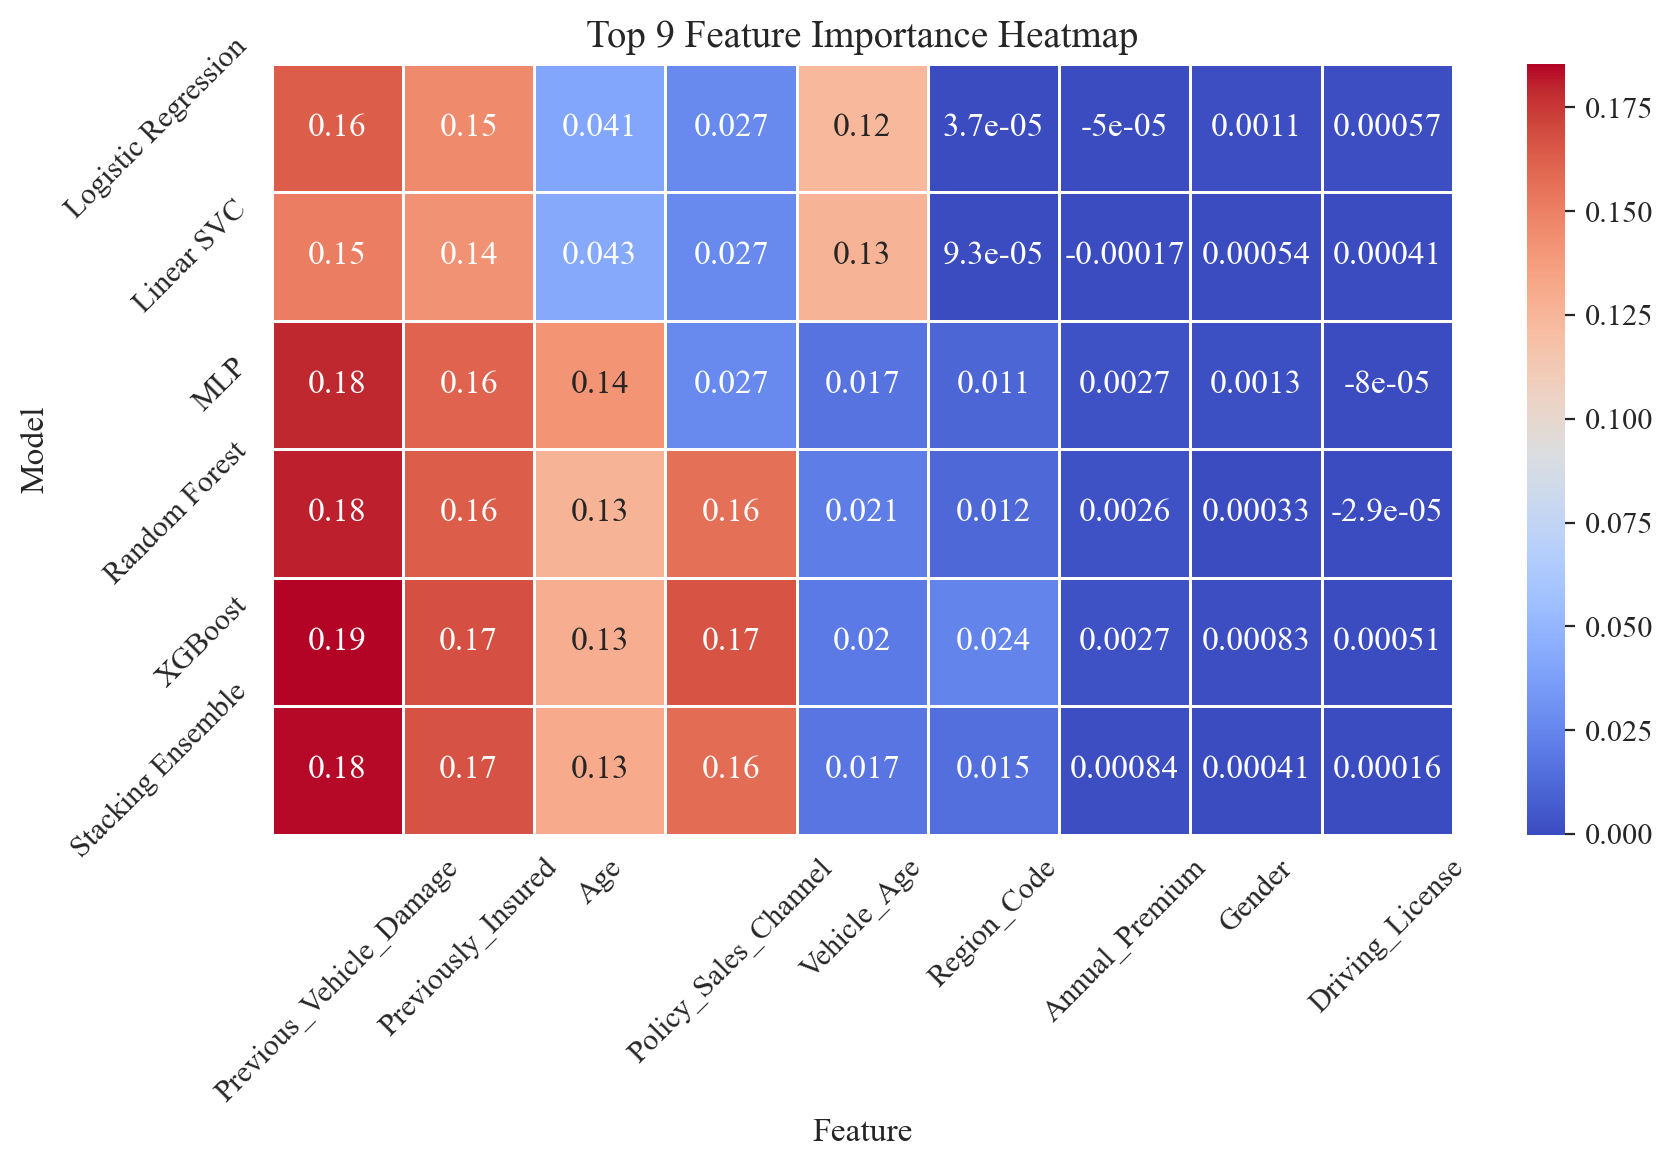

In [10]:
def plot_feature_importance_heatmap(results_df, features_col='ranked_pfi', top_n=None):
    # Extract feature importance dictionaries from the DataFrame
    results_df = results_df[results_df[features_col].notnull()]
    feature_importances = pd.DataFrame(results_df[features_col].tolist(), index=results_df['model'])
    # feature_importances = feature_importances.fillna(0)
    
    # Select the top N features based on mean importance
    top_n = top_n or feature_importances.shape[1]
    mean_importance = feature_importances.abs().mean(axis=0)
    top_features = mean_importance.nlargest(top_n).index
    top_feature_importances = feature_importances[top_features]

    # Plot the heatmap
    n_models = len(feature_importances)
    plt.figure(figsize=(top_n * 1, n_models * 1), dpi=200)
    
    # if features_col == 'ranked_pfi':
    sns.heatmap(top_feature_importances, annot=True, cmap='coolwarm', linewidths=0.5)
    # else:
    #     sns.heatmap(top_feature_importances.abs(), annot=top_feature_importances, vmin=0, vmax=1, cmap='coolwarm', linewidths=0.5)
    
    plt.title(f'Top {top_n} Feature Importance Heatmap')
    plt.xlabel('Feature')
    plt.xticks(rotation=45)
    plt.ylabel('Model')
    plt.yticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    

plot_feature_importance_heatmap(results_df, features_col='ranked_pfi')

Insights:
- Top-5 most impactful features on model performance according to PFI measure in average:
    - `Previous_Vehicle_Damage`: Consistently ranked as the most important across all models. Customers with prior vehicle damage have a much higher likelihood of submitting a claim. 
    - `Previously_Insured`: Being previously insured with the company was a strong predictor of claim submission.
    - `Age`: Customer experience and potential risk factors associated with different age groups impact claim behavior.
    - `Policy_Sales_Channel`: The sales channel used to purchase the policy influences claim submission behavior.
    - `Vehicle_Age`: Older vehicles are more likely to be involved in claims.